In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
# 1 Million Points from 0 to 10
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [6]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [7]:
my_data.head()

,X Data,Y
0,0.00000,4.562332
1,0.00001,4.860308
2,0.00002,4.606862
3,0.00003,4.898510
4,0.00004,5.364682


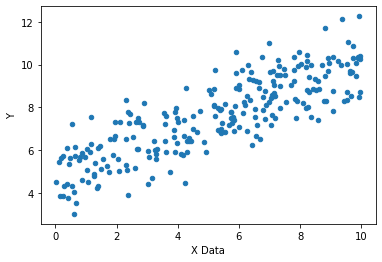

In [8]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

### Tensorflow

In [10]:
batch_size = 8

In [40]:
m = tf.Variable(0.35)
b = tf.Variable(0.18)

In [41]:
xph = tf.placeholder(tf.float32,[batch_size]) # features
yph = tf.placeholder(tf.float32,[batch_size]) # true labels

In [42]:
y_model = m*xph + b

In [44]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [45]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [46]:
init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 1000
    
    for i in range(epochs):
        
        # random indices 8 by 8
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        # dictionary made up from features and labels
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [52]:
model_m, model_b

(0.54694104, 4.9106216)

In [53]:
y_hat = x_data * model_m + model_b

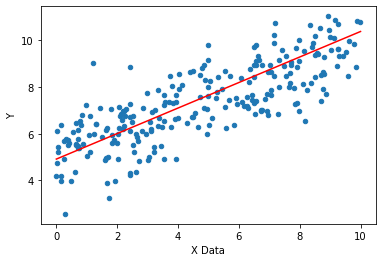

In [54]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API
- Estimator Types:
    - `tf.estimator.LinearClassifier`
    - `tf.estimator.LinearRegressor`
    
Work with estimators:
1. Define a list of feature columns
2. Create the Estimator Model
3. Create a Data Input Function
4. Call train, evaluate and predict methods on the estimator object

In [21]:
# Different columns available
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [22]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\dilet\\AppData\\Local\\Temp\\tmpqx476bsf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D0E5C60288>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [26]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Estimator Inputs


In [27]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [28]:
# Evaluation
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [29]:
# Prediction
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [30]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\dilet\AppD

### Evaluation

In [31]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-20T16:49:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dilet\AppData\Local\Temp\tmpqx476bsf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-20-16:49:45
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1052223, global_step = 1000, label/mean = 7.497822, loss = 4.4208894, prediction/mean = 7.4394774
INFO:tensorflow:Saving 'checkpoint_pat

In [33]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-20T16:50:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dilet\AppData\Local\Temp\tmpqx476bsf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-20-16:50:14
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1244797, global_step = 1000, label/mean = 7.483268, loss = 4.4979186, prediction/mean = 7.4004836
INFO:tensorflow:Saving 'checkpoint_pat

In [34]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.1052223, 'label/mean': 7.497822, 'loss': 4.4208894, 'prediction/mean': 7.4394774, 'global_step': 1000}
eval metrics: {'average_loss': 1.1244797, 'label/mean': 7.483268, 'loss': 4.4979186, 'prediction/mean': 7.4004836, 'global_step': 1000}


### Predictions

In [35]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [36]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dilet\AppData\Local\Temp\tmpqx476bsf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4358954], dtype=float32)},
 {'predictions': array([5.0993876], dtype=float32)},
 {'predictions': array([5.76288], dtype=float32)},
 {'predictions': array([6.426372], dtype=float32)},
 {'predictions': array([7.0898647], dtype=float32)},
 {'predictions': array([7.7533565], dtype=float32)},
 {'predictions': array([8.416849], dtype=float32)},
 {'predictions': array([9.080341], dtype=float32)},
 {'predictions': array([9.743834], dtype=float32)},
 {'predictions': array([10.407326], dtype=float32)}]

In [37]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dilet\AppData\Local\Temp\tmpqx476bsf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [38]:
predictions

[array([4.4358954], dtype=float32),
 array([5.0993876], dtype=float32),
 array([5.76288], dtype=float32),
 array([6.426372], dtype=float32),
 array([7.0898647], dtype=float32),
 array([7.7533565], dtype=float32),
 array([8.416849], dtype=float32),
 array([9.080341], dtype=float32),
 array([9.743834], dtype=float32),
 array([10.407326], dtype=float32)]

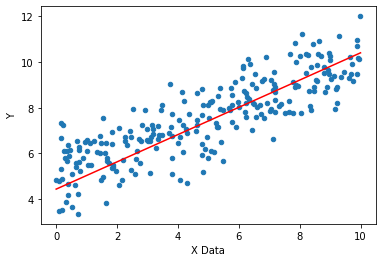

In [39]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')